## Grupowanie górskie:

In [122]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm, det, inv

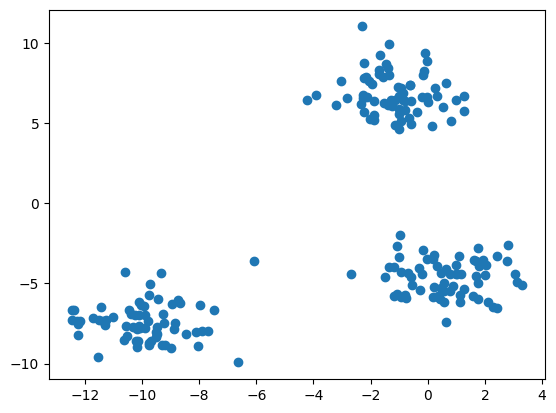

In [2]:
X, y = make_blobs(n_samples=200, random_state=100, n_features=2, centers = 3, cluster_std = 1.2)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
def mountain(points, c, b, sigma):
    total = 0.0
    
    for point in points:
        total += np.exp(- (norm(c - point) ** (2 * b)) / (2 * sigma ** 2))
    
    return total

In [4]:
b = 1.0
sigma = 1.0

x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
y_min = np.min(X[:,1])
y_max = np.max(X[:,1])

grid_x = np.arange(x_min, x_max, 0.2)
grid_y = np.arange(y_min, y_max, 0.2)
    
centers = []

# Szukanie pierwszego centrum
max_value = -1.0
center = None

for y in grid_y:
    for x in grid_x:
        c = np.array([x, y])
        value = mountain(X, c, 1.0, 1.0)
        
        if value > max_value:
            max_value = value
            center = np.array([x, y])
                    
centers.append(center)


# Szukanie drugiego centrum
max_value = -1.0
center = None

for y in grid_y:
    for x in grid_x:
        c = np.array([x, y])
        value = mountain(X, c, b, sigma)
        value -= mountain(X, centers[0], b, sigma) * np.exp(- (norm(c - centers[0]) ** (2 * b)) / (2 * sigma ** 2))
        
        if value > max_value:
            max_value = value
            center = np.array([x, y])
                    
centers.append(center)


# Szukanie trzeciego centrum
max_value = -1.0
center = None

for y in grid_y:
    for x in grid_x:
        c = np.array([x, y])
        value = mountain(X, c, b, sigma)
        value -= mountain(X, centers[0], b, sigma) * np.exp(- (norm(c - centers[0]) ** (2 * b)) / (2 * sigma ** 2))
        value -= (
            (mountain(X, centers[1], b, sigma) - mountain(X, centers[0], b, sigma) * np.exp(- (norm(centers[1] - centers[0]) ** (2 * b)) / (2 * sigma ** 2)))
        ) * np.exp(- (norm(c - centers[1]) ** (2 * b)) / (2 * sigma ** 2))
        
        if value > max_value:
            max_value = value
            center = np.array([x, y])

centers.append(center)

print(centers)

[array([-1.06511532,  6.46394556]), array([-9.86511532, -7.73605444]), array([ 0.53488468, -4.93605444])]


In [5]:
classification = []

for point in X:
    c_0 = np.exp(- (norm(point - centers[0]) ** (2 * b)) / (2 * sigma ** 2))
    c_1 = np.exp(- (norm(point - centers[1]) ** (2 * b)) / (2 * sigma ** 2))
    c_2 = np.exp(- (norm(point - centers[2]) ** (2 * b)) / (2 * sigma ** 2))

    c_list = [c_0, c_1, c_2]
    c = c_list.index(max(c_list))
    
    classification.append(c)

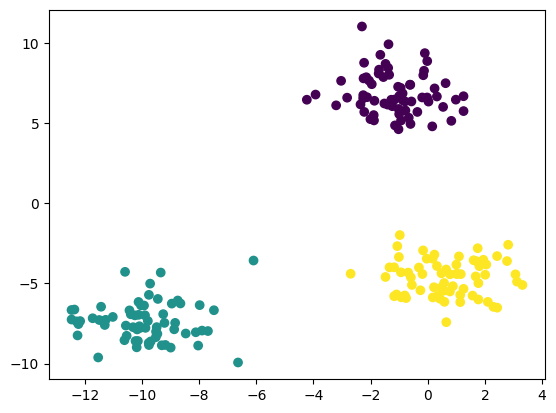

In [6]:
plt.scatter(X[:,0], X[:,1], c=classification)
plt.show()

## Algorytm Gustafsona-Kessela:

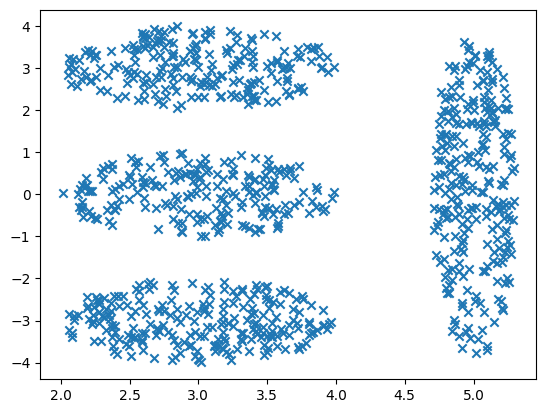

In [11]:
n = 10000
x = np.random.uniform(-6, 6, n)
y = np.random.uniform(-6, 6, n)

x1 = []
y1 = []

for i in range(n):
    if ((x[i]-5)**2)/0.3**2+((y[i]-0)**2)/4**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-3)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]-0)**2)/1**2 <=1 or ((x[i]-3)**2)/1**2+((y[i]+3)**2)/1**2 <=1:
        x1.append(x[i])
        y1.append(y[i])
X = np.array([[x,y] for (x,y) in zip(x1,y1)])

plt.scatter(X[:,0], X[:,1], marker = "x")
plt.show()

In [290]:
def GustafsonKessel(points, clusters_number, m, max_iterations):
    distance = lambda point, center, transformation: np.sqrt((point - center).T @ transformation @ (point - center))

    dimensions = len(points[0])

    centers = [np.random.uniform(-6.0, 6.0, dimensions) for _ in range(clusters_number)]
    transformations = [np.identity(dimensions) for _ in range(clusters_number)]

    for _ in range(max_iterations):
        # Wyznaczanie macierzy współczynników uij
        uij = []
    
        for center, transformation in zip(centers, transformations):
            uij.append([])
    
            for point in points:
                total = 0.0
                dij = distance(point, center, transformation)
        
                for center_sum, transformation_sum in zip(centers, transformations):
                    total += (dij / distance(point, center_sum, transformation_sum)) ** (2 / (m - 1))
            
                uij[-1].append(1.0 / total)

        # Wyznaczanie nowych położeń centrów
        centers = []
    
        for uij_for_center in uij:
            total_uij = 0.0
            total_uij_x = 0.0
        
            for uij_number, point in zip(uij_for_center, points):
                total_uij_x += uij_number ** m * point
                total_uij += uij_number ** m
            
            centers.append(total_uij_x / total_uij)
        
        # Wyznaczanie macierzy kowariancji
        cov_matrices = []
    
        for uij_for_center, center in zip(uij, centers):
            total_uij_numerator = 0.0
            total_uij_x = 0.0
        
            for uij_number, point in zip(uij_for_center, points):
                total_uij_numerator += uij_number ** m * (point - center) * np.vstack(point - center)
                total_uij += uij_number ** m
            
            cov_matrices.append(total_uij_numerator / total_uij)
    
        # Wyznaczenie nowych macierzy transformacji
        transformations = []
    
        for cov_matrix in cov_matrices:
            transformations.append(det(cov_matrix) ** (1 / dimensions) * inv(cov_matrix))
            
            
    classification = []

    for point in X:
        distances = []
    
        for center, transformation in zip(centers, transformations):
            distances.append(distance(point, center, transformation))
        
        classification.append(distances.index(min(distances)))
        
    return classification

In [291]:
classification = GustafsonKessel(X, 4, 2.0, 128)

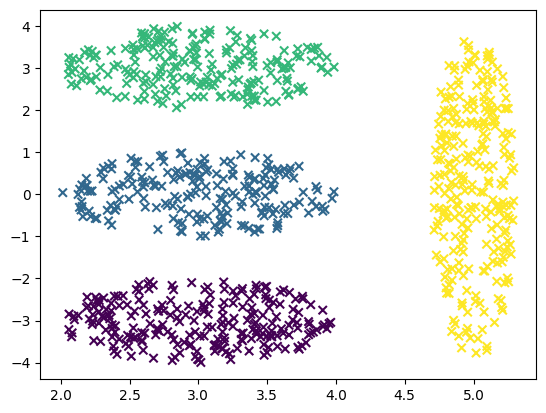

In [294]:
plt.scatter(X[:,0], X[:,1], marker = "x", c=classification)
plt.show()